# Задание 4
## Преобразование изображений 

Считываем исхобное изображение, приводим его к чёрно-белому формату и выполним преобразование Фурье.

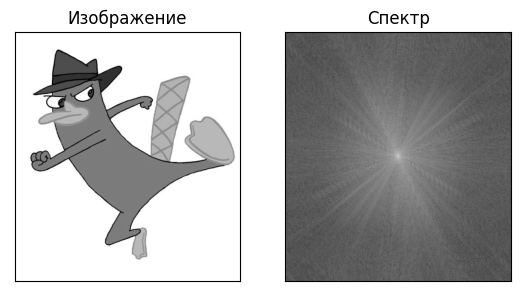

In [51]:
import cv2
import numpy
from matplotlib import pyplot

image = cv2.imread("image.jpeg", cv2.IMREAD_GRAYSCALE) # считываем в ЧБ формате
fShift = numpy.fft.fftshift(numpy.fft.fft2(image))    # Выполняем преобразование Фурье

# Оригинальное изображение
pyplot.subplot(121)
pyplot.imshow(image, "gray")
pyplot.title("Изображение")
pyplot.xticks([])
pyplot.yticks([])

# Спектр изображения
pyplot.subplot(122)
pyplot.imshow(numpy.log(numpy.abs(fShift)), "gray") # Логарифмическая шкала для визуального представления
pyplot.title("Спектр")
pyplot.xticks([])
pyplot.yticks([])

pyplot.show()

## Удаление основных частот
Если с преобразования удалить основные частоты (белое скопление в центре), то можно получить контур изображения. Попробуем обнулить частоты в центре изображения

([], [])

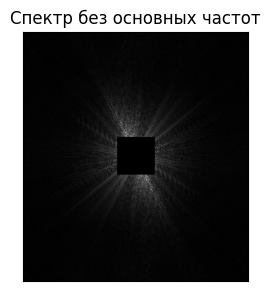

In [52]:
CENTER_D = 50

rows, cols = image.shape
centerRow = rows // 2
centerCol = cols // 2

fShift[centerRow - CENTER_D:centerRow + CENTER_D, centerCol - CENTER_D:centerCol + CENTER_D] = 0

# Спектр
pyplot.subplot(121)
pyplot.imshow(numpy.abs(fShift), "gray") # Не логарифмическая шкала
pyplot.title("Спектр без основных частот")
pyplot.xticks([])
pyplot.yticks([])

## Обратное преобразование 
Выполним обратное преобразование и посмотрим, что получилось.

([], [])

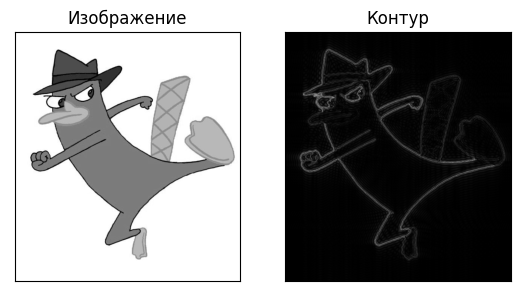

In [53]:
inverseShift = numpy.fft.ifftshift(fShift)
contourImage = numpy.abs(numpy.fft.ifft2(inverseShift))

# Оригинальное изображение 
pyplot.subplot(121)
pyplot.imshow(image, "gray")
pyplot.title("Изображение")
pyplot.xticks([])
pyplot.yticks([])

# Контур 
pyplot.subplot(122)
pyplot.imshow(contourImage, "gray")
pyplot.title("Контур")
pyplot.xticks([])
pyplot.yticks([])